## 4. K-means 알고리즘 실습 
 - P.386

```
실습]  UCI 머신러닝 저장소에서 제공하는 도매업 고객(wholesale customers) 데이터셋 사용
각 고객의 연간 구매금액을 상품 카테고리별로 구분하여 정리한 데이터
8개의 열에 440개의 관측값이 행으로 구현
1~2열은 고객의 일반 정보
‘Channel’ 열은 호텔/레스토랑 또는 소매점 등 판매채널
‘Region’ 열은 고객 소재지
비지도 학습 모형이므로 예측 변수를 지정할 필요가 없고 필요한 속성을 모두 설명 변수로 활용한다.
StandardScaler() 를 이용하여 학습 데이터를 정규화한다 – 서로 다른 변수 사이에 존재할 수 있는 데이터 값의 상대적 크기 사이에 발생하는 오류를 제거한다.
```

In [11]:
import pandas as pd
import numpy as np

#uci_path='http://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale_customers_data.csv'
uci_path='http://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
print(df.shape)
print(df.describe())
print(df.info())

(440, 8)
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.75000

In [15]:
X = df.iloc[:,:]
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [20]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X) ##정규화 과정 진행, 이후 데이터들은 0~1사이 또는 -1~1 사이 값을 갖는다.
X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [21]:
#모델 학습
from sklearn import cluster
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
#군집분석 예측
cluster_label = kmeans.labels_ # 군집분석에 대한 예측
print(cluster_label)

[3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 0 3 0 3 0 3 0 0 2 3 3 0 0 3 0 0 0 0 0 0 3 0
 3 3 0 0 0 3 3 3 3 3 2 3 3 0 0 3 3 0 0 2 3 0 0 3 2 3 3 0 2 0 3 0 0 0 0 0 3
 3 0 0 3 0 0 0 3 3 0 3 2 2 0 0 0 0 0 2 0 3 0 3 0 0 0 3 3 3 0 0 0 3 3 3 3 0
 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 3 3 0 3 3 3 0 0 3 3 3 3 0 0 0 3 3 0 3 0 3 0 0 0 0 0 2 0 4 0
 0 0 0 3 3 0 0 0 3 0 0 1 3 1 1 3 3 1 1 1 3 1 1 1 3 1 2 1 1 3 1 3 1 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 3 1 3 1 3 1 1 1 1 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 3 1 3
 1 3 3 1 3 3 3 3 3 3 3 1 1 3 1 1 3 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1
 2 1 3 1 1 1 1 3 3 0 3 0 0 3 3 0 3 0 3 0 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0
 3 0 0 3 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 3 3 0 0 0 0 0 0 3 3 0 3 0 0 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]


In [27]:

# 새 컬럼에 저장
df['Cluster'] = cluster_label
df['Cluster']

print(df.head())
print(df.info())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        3  
1        1776        3  
2        7844        3  
3        1788        0  
4        5185        3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
Cluster      

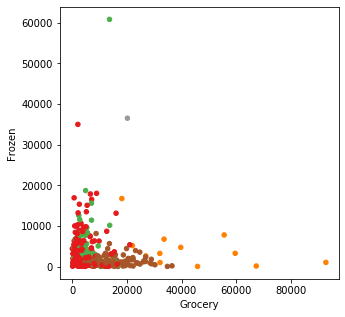

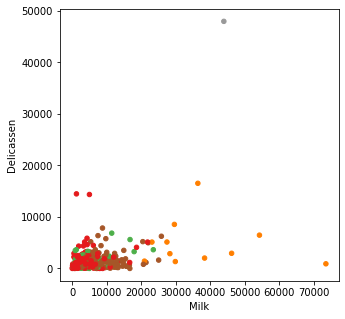

In [30]:
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(5, 5))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', colorbar=False, figsize=(5, 5))
plt.show()
plt.close()

In [23]:
import matplotlib.pyplot as plt

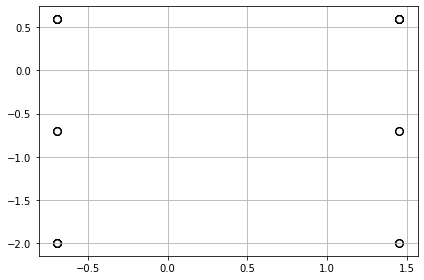

In [26]:
plt.scatter(X[:,0],
           X[:,1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50
           )
plt.grid()
plt.tight_layout()
plt.show()